In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

# 데이터 로드
df = pd.read_csv("감자/감자(EDA용)_스케일링만.csv", encoding='cp949', parse_dates=["week_start"])
df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week

# 계절 컬럼 생성
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = df['month'].apply(get_season)

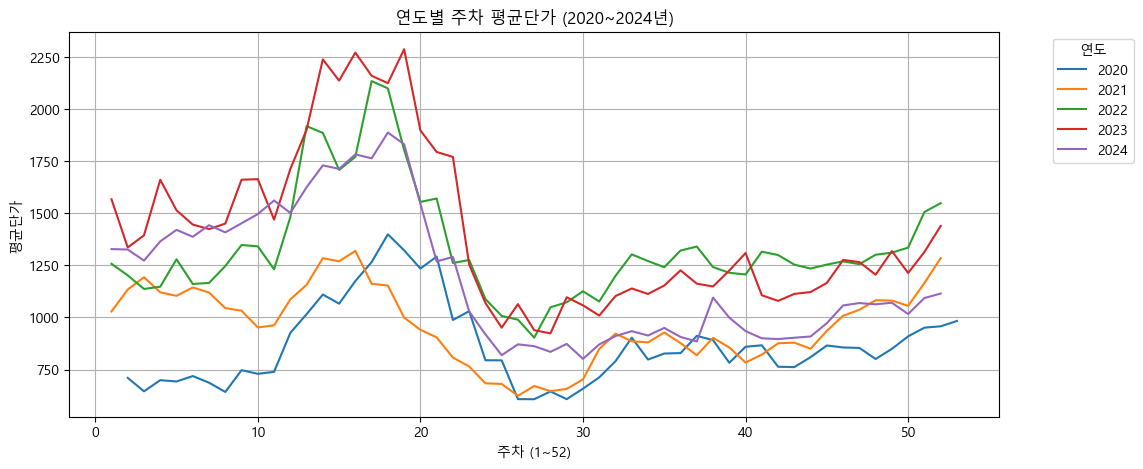

In [44]:
df_filtered = df[df['year'].between(2020, 2024)]

weekly_avg = df_filtered.groupby(['week', 'year'])['평균단가(원)'].mean().unstack()

weekly_avg.plot(figsize=(12, 5), title = "연도별 주차 평균단가 (2020~2024년)")
plt.xlabel("주차 (1~52)")
plt.ylabel("평균단가")
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

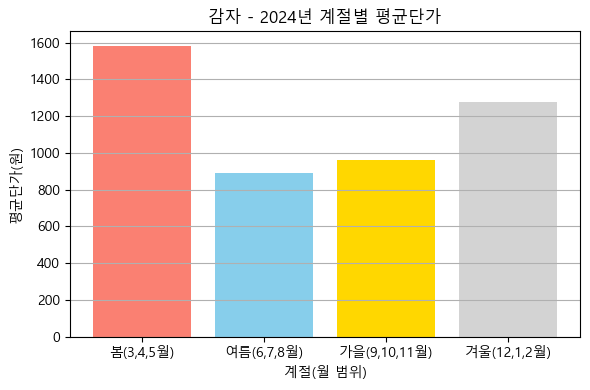

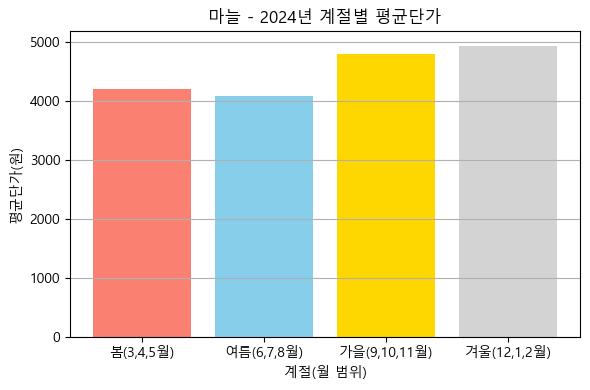

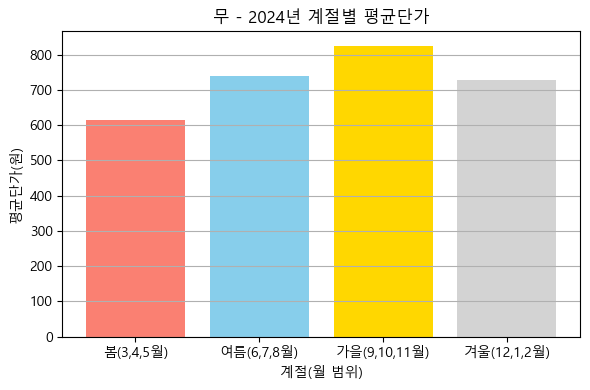

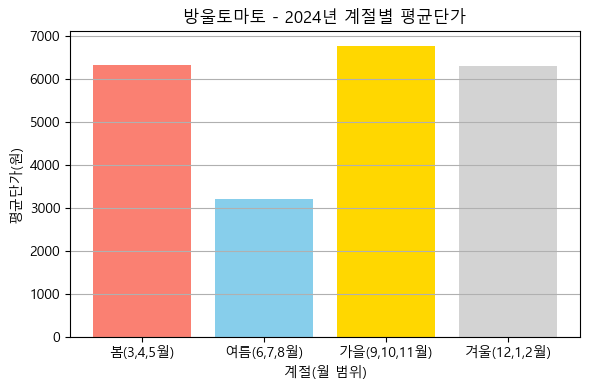

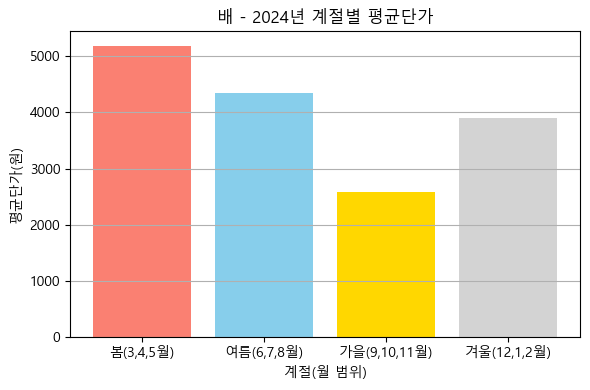

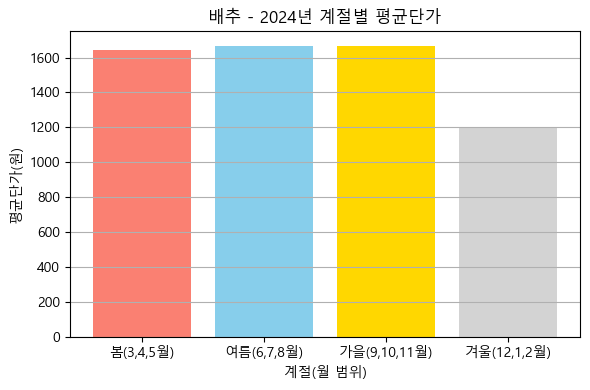

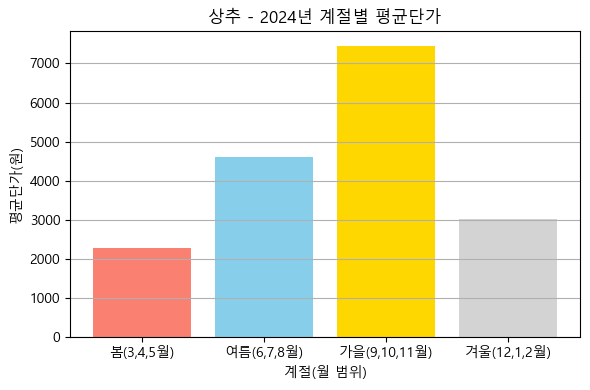

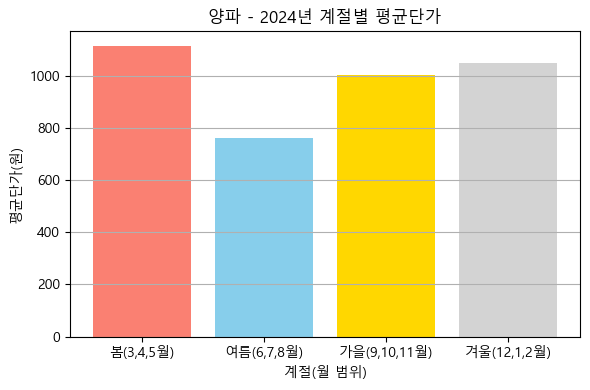

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns
import re

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

file_list = glob.glob('EDA/*.csv')

def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'
    
season_legend = {
    '봄': '3,4,5월',
    '여름': '6,7,8월',
    '가을': '9,10,11월',
    '겨울': '12,1,2월'
}

# 계절별 색상
season_colors = {
    '봄': 'salmon',
    '여름': 'skyblue',
    '가을': 'gold',
    '겨울': 'lightgray'
}

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding = 'cp949', parse_dates=['week_start'])

        # 연도 및 주차 추출
        df['year'] = df['week_start'].dt.year
        df['month'] = df['week_start'].dt.month
        df['season'] = df['month'].apply(get_season)

        # 2024년만 필터링
        df_2024 = df[df['year'] == 2024]

        # 계절별 평균단가 계산
        seasonal_avg = df_2024.groupby('season')['평균단가(원)'].mean().reindex(['봄', '여름', '가을', '겨울'])

        # 품목명 추출 (파일명에서)
        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0]

        # 시각화
        plt.figure(figsize=(6, 4))

        seasons = seasonal_avg.index.tolist()
        values = seasonal_avg.values.tolist()
        colors = [season_colors[s] for s in seasons]

        # 막대 그리기
        plt.bar(range(len(seasons)), values, color=colors)

        # X축 레이블에 월 포함
        xtick_labels = [f"{s}({season_legend[s]})" for s in seasons]
        plt.xticks(ticks=range(len(seasons)), labels=xtick_labels, rotation=0)

        plt.title(f"{item_name.strip()} - 2024년 계절별 평균단가")
        plt.xlabel("계절(월 범위)")
        plt.ylabel("평균단가(원)")
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ 파일 처리 중 오류 발생: {file_path}")
        print(f"에러 내용: {e}")

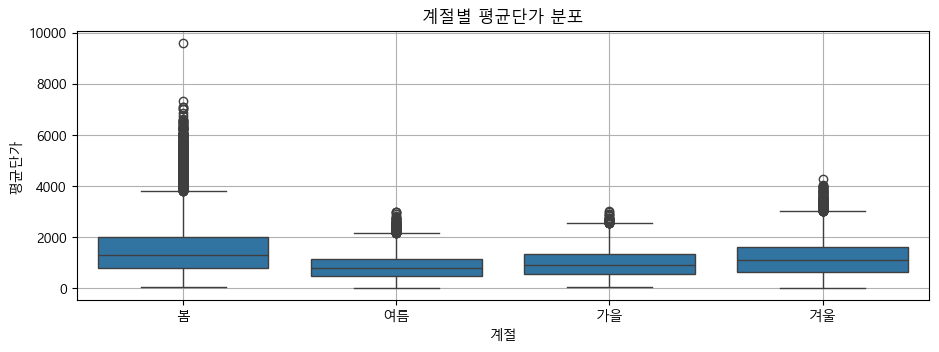

In [49]:
plt.figure(figsize=(11, 3.5))
sns.boxplot(x='season', y='평균단가(원)', data=df, order=['봄', '여름', '가을', '겨울'])
plt.title("계절별 평균단가 분포")
plt.xlabel("계절")
plt.ylabel("평균단가")
plt.grid(True)
plt.show()

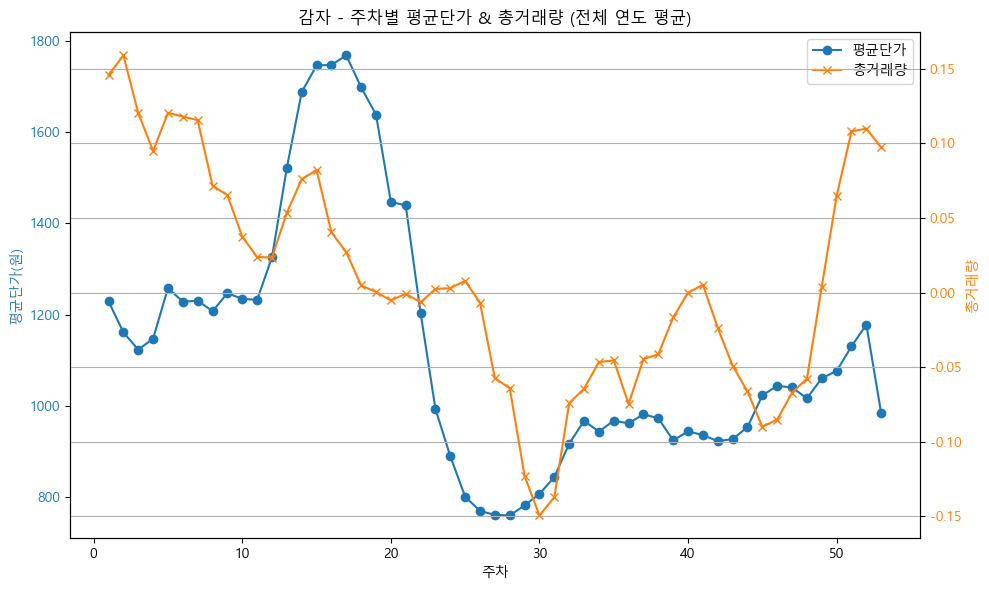

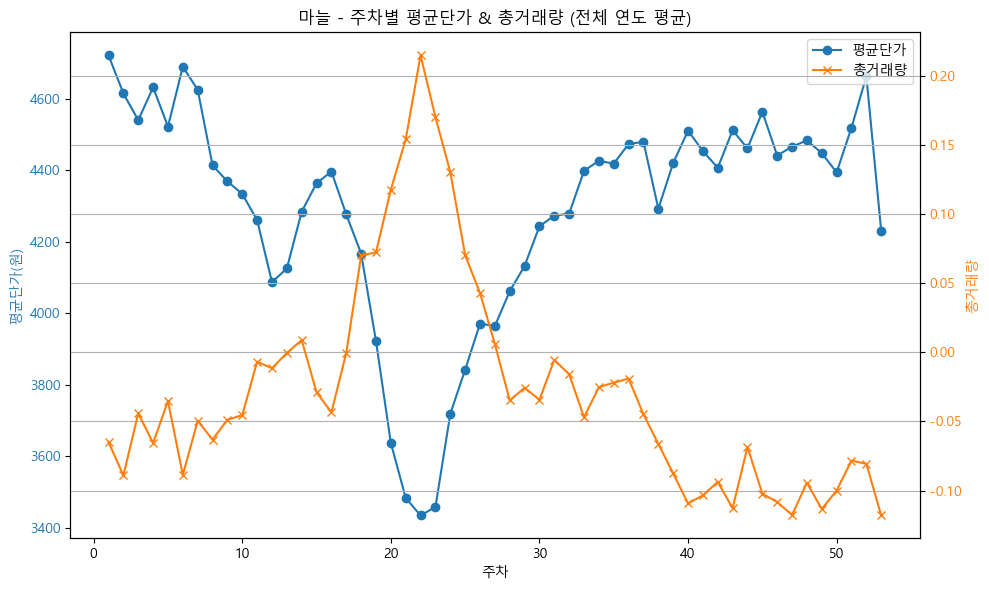

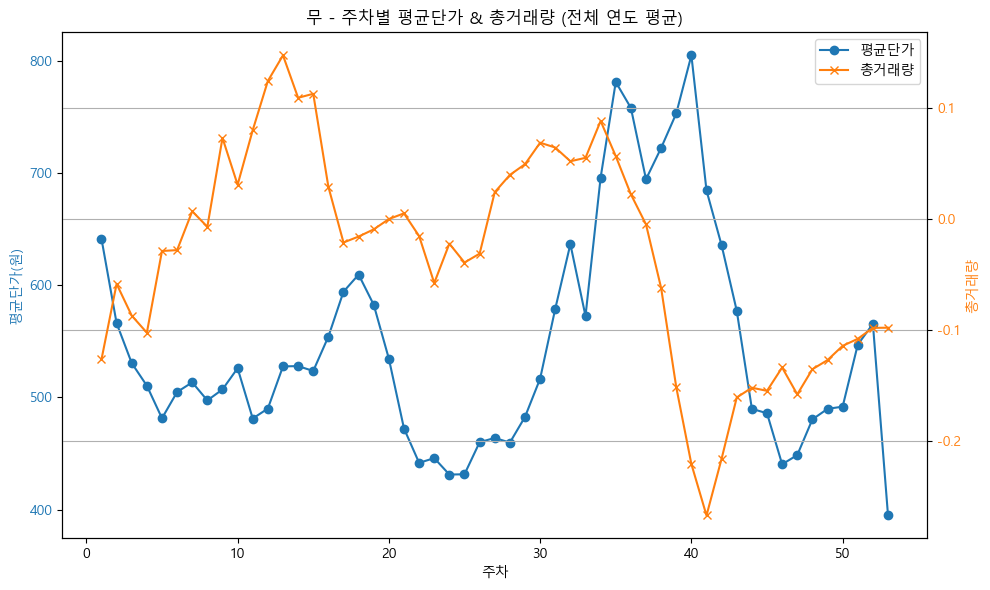

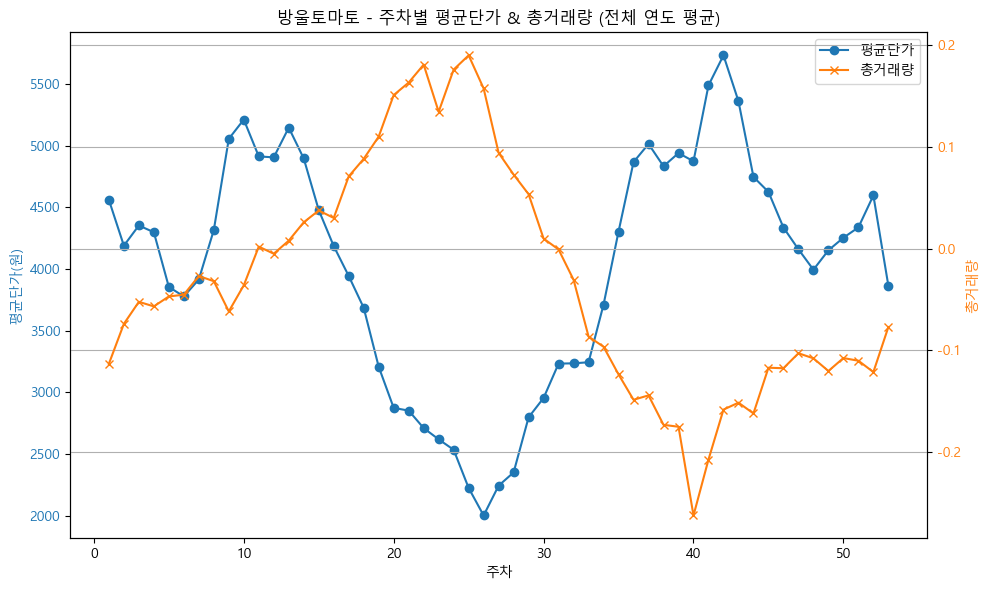

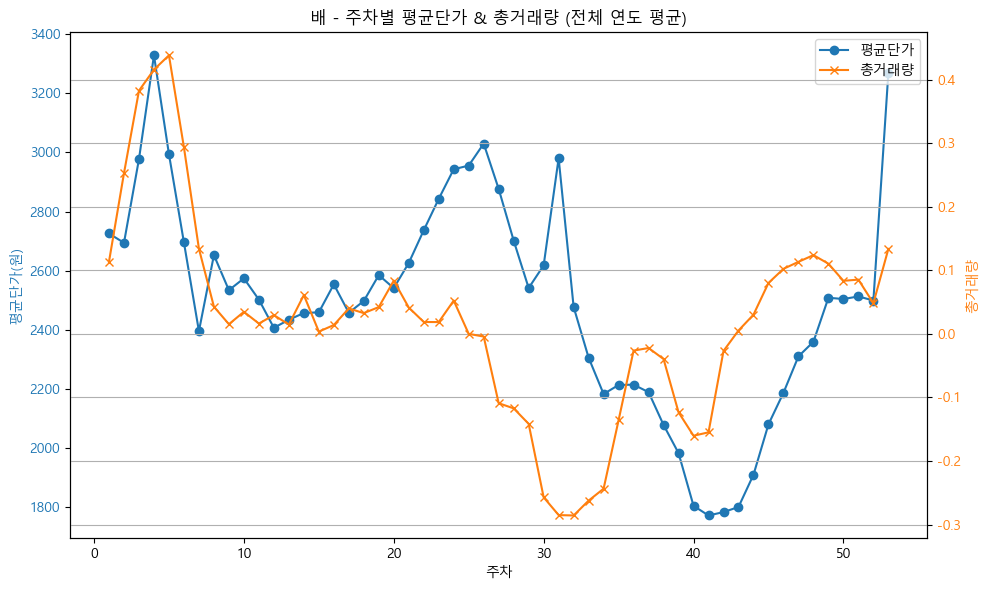

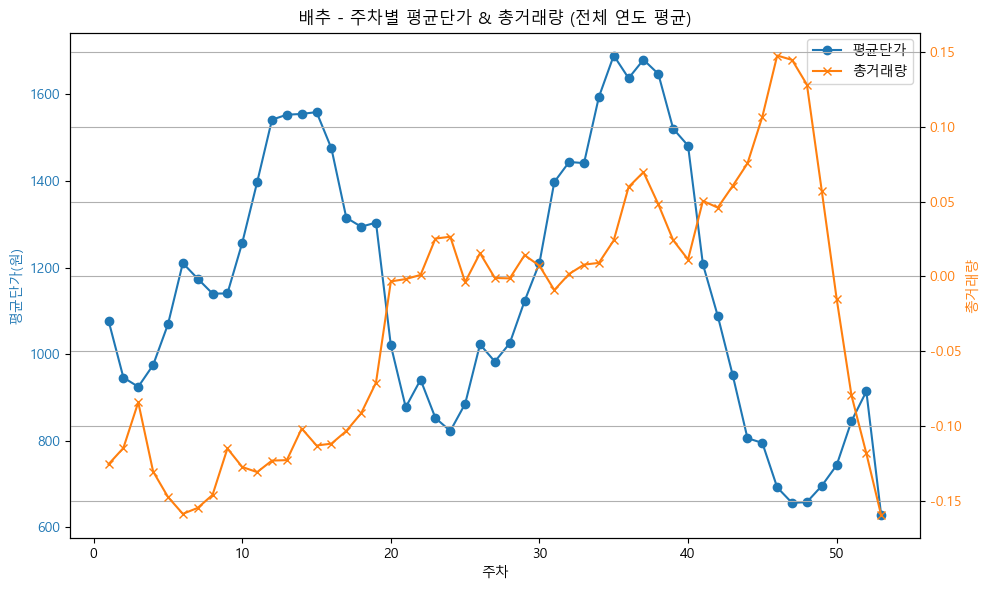

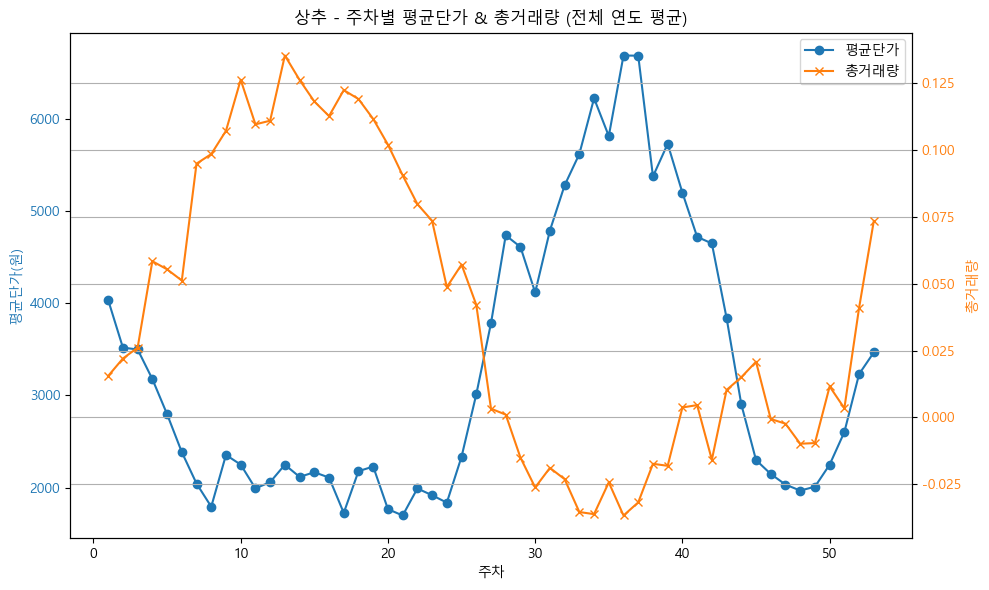

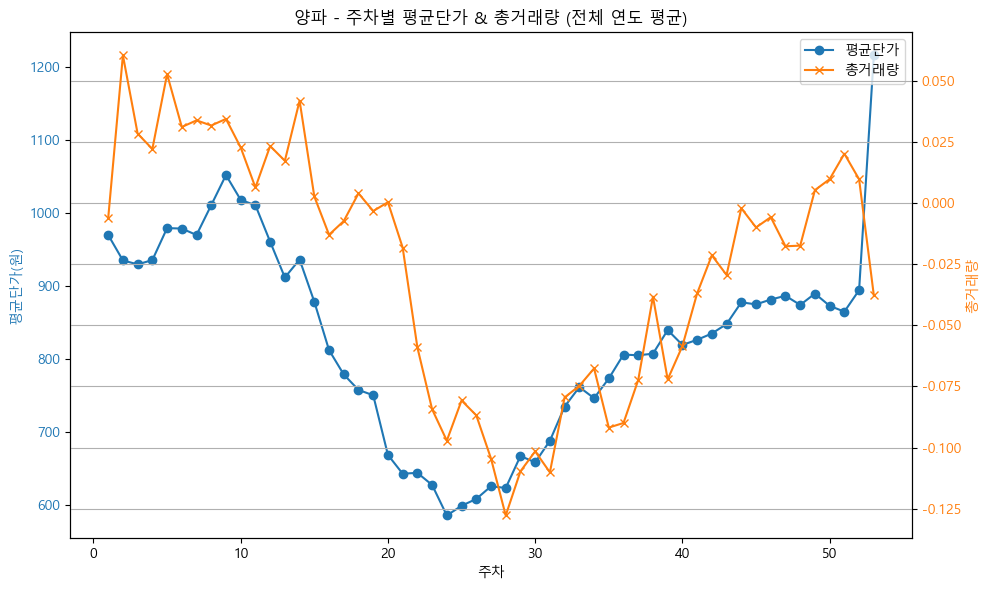

In [15]:
file_list = glob.glob('EDA/*.csv')

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding='cp949', parse_dates=['week_start'])

        df['week'] = df['week_start'].dt.isocalendar().week

        weekly_avg = df.groupby('week')[['평균단가(원)', '총거래량(kg)']].mean().reset_index()

        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0].strip()

        # 이중축 그래프
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # 첫 번째 Y축 (평균단가)
        line1, = ax1.plot(weekly_avg['week'], weekly_avg['평균단가(원)'], color='tab:blue', marker='o', label='평균단가')
        ax1.set_xlabel("주차")
        ax1.set_ylabel("평균단가(원)", color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # 두 번째 Y축 (거래량)
        ax2 = ax1.twinx()
        line2, = ax2.plot(weekly_avg['week'], weekly_avg['총거래량(kg)'], color='tab:orange', marker='x', label='총거래량')
        ax2.set_ylabel("총거래량", color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')
        
        # 범례 통합
        lines = [line1, line2]
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='upper right')

        # 제목 및 레이아웃
        plt.title(f"{item_name} - 주차별 평균단가 & 총거래량 (전체 연도 평균)")
        fig.tight_layout()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"⚠️ 파일 처리 중 오류 발생: {file_path}")
        print(f"에러 내용: {e}")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 데이터 로드
df = pd.read_csv("감자/감자(EDA용)_스케일링만.csv", encoding='cp949', parse_dates=["week_start"])

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week
df['dayofweek'] = df['week_start'].dt.dayofweek

In [3]:
# 타겟: 다음 주의 평균단가 예측
target_col = '평균단가(원)'
X = df.drop(columns=[target_col, 'week_start'])  # week_start는 시간 인덱스이므로 제외
y = df[target_col]

✅ 모델 학습 완료 (2024년까지)


In [4]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [8]:
for i, (train_idx, test_idx) in enumerate(tscv.split(df), 1):
    print(f"[Fold {i}]")
    print("Train 기간:", df.iloc[train_idx[0]]['week_start'], "→", df.iloc[train_idx[-1]]['week_start'])
    print("Test  기간:", df.iloc[test_idx[0]]['week_start'], "→", df.iloc[test_idx[-1]]['week_start'])

[Fold 1]
Train 기간: 2018-01-29 00:00:00 → 2019-03-25 00:00:00
Test  기간: 2019-03-25 00:00:00 → 2020-04-27 00:00:00
[Fold 2]
Train 기간: 2018-01-29 00:00:00 → 2020-04-27 00:00:00
Test  기간: 2020-04-27 00:00:00 → 2021-06-21 00:00:00
[Fold 3]
Train 기간: 2018-01-29 00:00:00 → 2021-06-21 00:00:00
Test  기간: 2021-06-21 00:00:00 → 2022-09-26 00:00:00
[Fold 4]
Train 기간: 2018-01-29 00:00:00 → 2022-09-26 00:00:00
Test  기간: 2022-09-26 00:00:00 → 2024-02-05 00:00:00
[Fold 5]
Train 기간: 2018-01-29 00:00:00 → 2024-02-05 00:00:00
Test  기간: 2024-02-05 00:00:00 → 2025-05-26 00:00:00


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
tscv = TimeSeriesSplit(n_splits=5)

mae_list, rmse_list, r2_list = [], [], []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"[Fold {fold}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

[Fold 1] MAE: 376.53 | RMSE: 479.51 | R²: 0.1619
[Fold 2] MAE: 237.22 | RMSE: 321.98 | R²: 0.6215
[Fold 3] MAE: 314.67 | RMSE: 427.18 | R²: 0.5527
[Fold 4] MAE: 208.51 | RMSE: 286.41 | R²: 0.8336
[Fold 5] MAE: 317.26 | RMSE: 405.08 | R²: 0.6609


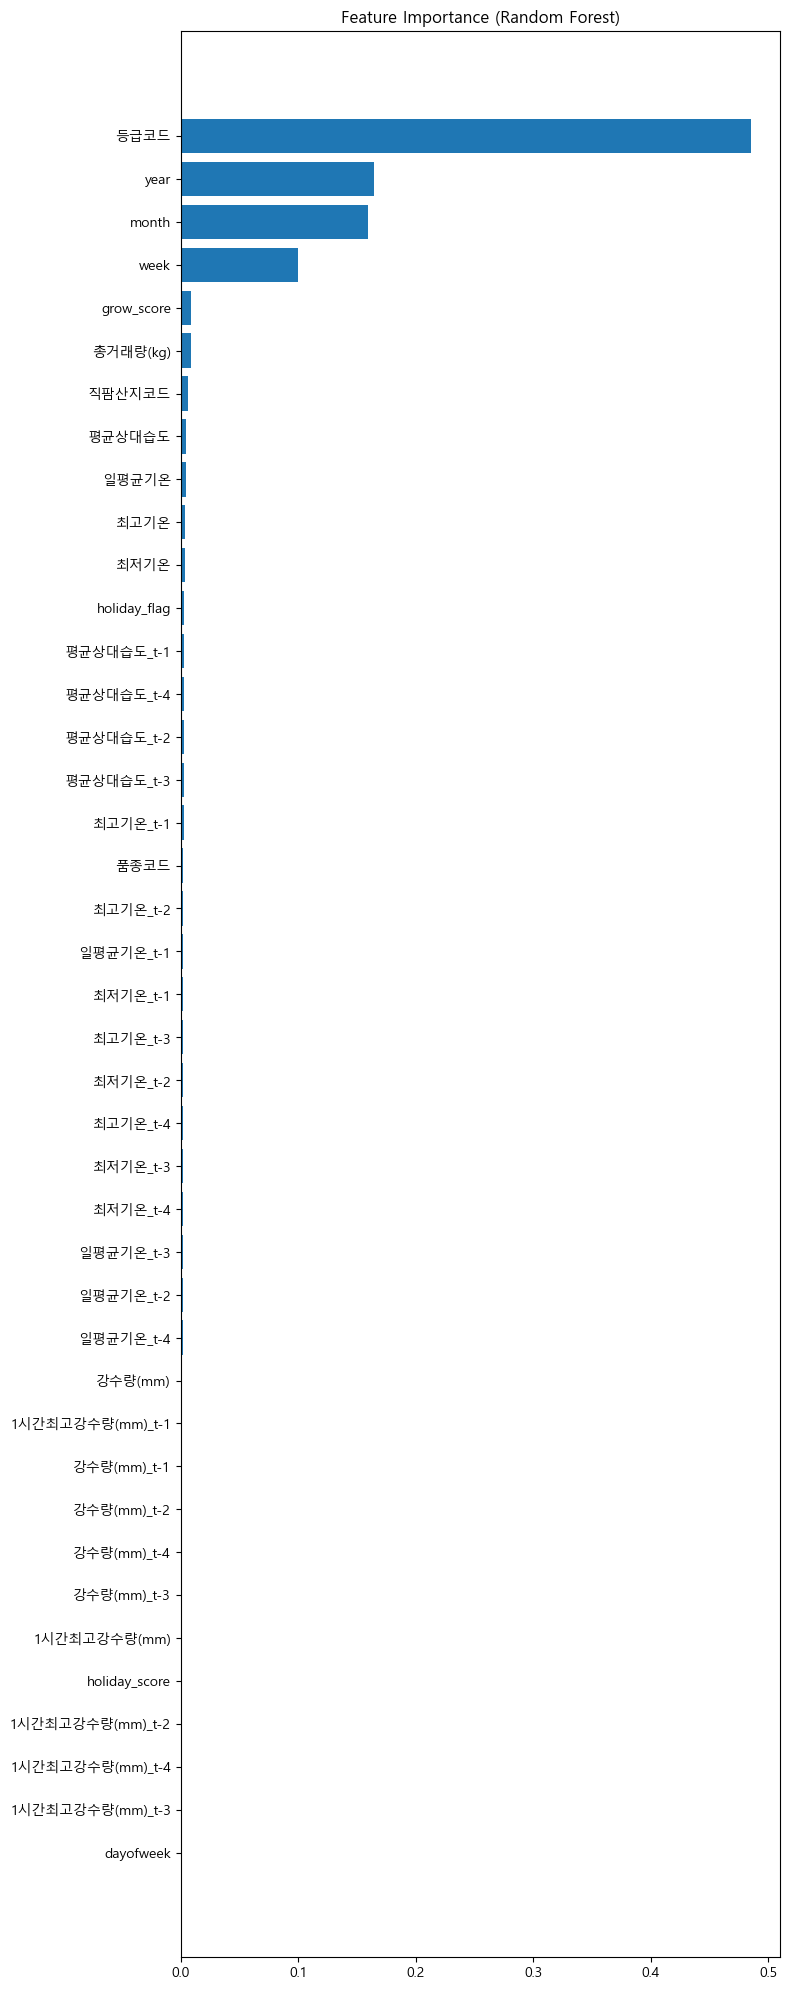

In [6]:
# 전체 데이터로 다시 학습
model.fit(X, y)

# 중요도 추출
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# 시각화
plt.figure(figsize=(8, len(feature_names)//2))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor

# 1. CSV 파일 불러오기
df = pd.read_csv("EDA/무(EDA용)_스케일링만.csv", encoding="cp949")

# 2. 전처리
df = df.drop(columns=["등급코드"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 주차를 주기로 변환 (1년 52주)
df_model["week_sin"] = np.sin(2 * np.pi * df_model["week"] / 52)
df_model["week_cos"] = np.cos(2 * np.pi * df_model["week"] / 52)

# 3. 변수 정의
target_col = "평균단가(원)"
lag_features = [
    "일평균기온", "최고기온", "최저기온", "평균상대습도", "강수량(mm)", "1시간최고강수량(mm)",
    "일평균기온_t-1", "최고기온_t-1", "최저기온_t-1", "평균상대습도_t-1", "강수량(mm)_t-1", "1시간최고강수량(mm)_t-1",
    "일평균기온_t-2", "최고기온_t-2", "최저기온_t-2", "평균상대습도_t-2", "강수량(mm)_t-2", "1시간최고강수량(mm)_t-2",
    "일평균기온_t-3", "최고기온_t-3", "최저기온_t-3", "평균상대습도_t-3", "강수량(mm)_t-3", "1시간최고강수량(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["품종코드", "직팜산지코드"]
numeric_features = ["총거래량(kg)"]

# 4. feature 구성
used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]
df_model = df.dropna(subset=[target_col] + used_features)

# 5. 원-핫 인코딩
df_model = pd.get_dummies(df_model, columns=categorical_cols)

In [23]:
# 6. X, y 분리
y = df_model[target_col]
X = df_model.drop(columns=[target_col])

# 7. 학습셋 구성 (2025년 제외)
df_model = df_model[df_model["year"] <= 2024].copy()
y = df_model["평균단가(원)"]
X = df_model.drop(columns=["평균단가(원)", "year", "week", "week_start"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

# 8. 학습/검증 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 9. 모델 및 파라미터 그리드 정의
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}

# 10. RMSE를 최소화하는 방향으로 GridSearchCV 구성
rmse_scorer = make_scorer(mean_squared_error, squared=False)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=3,  # 교차검증 fold 수
    verbose=1,
    n_jobs=-1
)

# 11. 학습
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 8], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(mean_squared_error, squared=False), verbose=1)

In [25]:
# 12. 결과 출력
print("✅ Best parameters:", grid_search.best_params_)
print("✅ Best RMSE:", grid_search.best_score_)

✅ Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
✅ Best RMSE: 295.2413365345303


In [26]:
from sklearn.metrics import r2_score

# 1. 최적 모델 추출
best_model = grid_search.best_estimator_

# 2. test셋 성능 평가
y_pred = best_model.predict(X_val)

# 3. 평가 지표 출력
rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE (test): {rmse:,.2f}")
print(f"✅ MAE (test): {mae:,.2f}")
print(f"✅ R² Score (test): {r2:.4f}")

✅ RMSE (test): 292.22
✅ MAE (test): 224.45
✅ R² Score (test): 0.1679


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor

# 1. CSV 파일 불러오기
df = pd.read_csv("EDA/무(EDA용)_스케일링만.csv", encoding="cp949")

# 2. 전처리
df = df.drop(columns=["등급코드"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 3. 주차를 주기로 변환 (1년 52주)
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 4. 변수 정의
target_col = "평균단가(원)"
lag_features = [
    "일평균기온", "최고기온", "최저기온", "평균상대습도", "강수량(mm)", "1시간최고강수량(mm)",
    "일평균기온_t-1", "최고기온_t-1", "최저기온_t-1", "평균상대습도_t-1", "강수량(mm)_t-1", "1시간최고강수량(mm)_t-1",
    "일평균기온_t-2", "최고기온_t-2", "최저기온_t-2", "평균상대습도_t-2", "강수량(mm)_t-2", "1시간최고강수량(mm)_t-2",
    "일평균기온_t-3", "최고기온_t-3", "최저기온_t-3", "평균상대습도_t-3", "강수량(mm)_t-3", "1시간최고강수량(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["품종코드", "직팜산지코드"]
numeric_features = ["총거래량(kg)", "week_sin", "week_cos"]

used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]

In [28]:
# 5. 결측치 제거
df_model = df.dropna(subset=[target_col] + used_features).copy()

# 6. 원-핫 인코딩
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# 7. 2025년 제외 후 X, y 분리
df_model = df_model[df_model["year"] <= 2024]
y = df_model["평균단가(원)"]
X = df_model.drop(columns=["평균단가(원)", "year", "week", "week_start"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

In [29]:
# 8. TimeSeriesSplit 정의
tscv = TimeSeriesSplit(n_splits=5)

# 9. 하이퍼파라미터 그리드
param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0]
}

In [30]:
# 10. RMSE 기준 scorer 설정
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# 11. GridSearchCV 구성
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=tscv,
    verbose=1,
    n_jobs=-1
)

In [31]:
# 12. 학습
grid_search.fit(X, y)

# 13. 결과 출력
print("✅ Best parameters:", grid_search.best_params_)
print("✅ Best RMSE:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best parameters: {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
✅ Best RMSE: 342.86794029660666


In [32]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. CSV 불러오기
df = pd.read_csv("EDA/무(EDA용)_스케일링만.csv", encoding="cp949")
df = df.drop(columns=["등급코드"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. 주기 파생변수 추가
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. 변수 정의
target_col = "평균단가(원)"
lag_features = [
    "일평균기온", "최고기온", "최저기온", "평균상대습도", "강수량(mm)", "1시간최고강수량(mm)",
    "일평균기온_t-1", "최고기온_t-1", "최저기온_t-1", "평균상대습도_t-1", "강수량(mm)_t-1", "1시간최고강수량(mm)_t-1",
    "일평균기온_t-2", "최고기온_t-2", "최저기온_t-2", "평균상대습도_t-2", "강수량(mm)_t-2", "1시간최고강수량(mm)_t-2",
    "일평균기온_t-3", "최고기온_t-3", "최저기온_t-3", "평균상대습도_t-3", "강수량(mm)_t-3", "1시간최고강수량(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["품종코드", "직팜산지코드"]
numeric_features = ["총거래량(kg)", "week_sin", "week_cos"]

used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]

In [33]:
# 4. 결측치 제거 + 원핫인코딩
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# 5. 학습 대상 데이터 구성 (2025 제외)
df_model = df_model[df_model["year"] <= 2024]
y = df_model["평균단가(원)"]
X = df_model.drop(columns=["평균단가(원)", "year", "week", "week_start"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

In [34]:
# 6. 최적 하이퍼파라미터로 모델 학습
best_model = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.2,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
best_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
# 7. 학습 데이터에 대한 예측 및 평가
y_pred = best_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# 8. 출력
print(f"✅ RMSE (train): {rmse:.2f}")
print(f"✅ MAE (train): {mae:.2f}")
print(f"✅ R² Score (train): {r2:.4f}")

✅ RMSE (train): 155.07
✅ MAE (train): 118.35
✅ R² Score (train): 0.7657


In [41]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv("EDA/무(EDA용)_스케일링만.csv", encoding="cp949")
df = df.drop(columns=["등급코드"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. 주기 파생변수
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. 변수 정의
target_col = "평균단가(원)"
lag_features = [
    "일평균기온", "최고기온", "최저기온", "평균상대습도", "강수량(mm)", "1시간최고강수량(mm)",
    "일평균기온_t-1", "최고기온_t-1", "최저기온_t-1", "평균상대습도_t-1", "강수량(mm)_t-1", "1시간최고강수량(mm)_t-1",
    "일평균기온_t-2", "최고기온_t-2", "최저기온_t-2", "평균상대습도_t-2", "강수량(mm)_t-2", "1시간최고강수량(mm)_t-2",
    "일평균기온_t-3", "최고기온_t-3", "최저기온_t-3", "평균상대습도_t-3", "강수량(mm)_t-3", "1시간최고강수량(mm)_t-3"
]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["품종코드", "직팜산지코드"]
numeric_features = ["총거래량(kg)", "week_sin", "week_cos"]
used_features = numeric_features + lag_features + derived_features + categorical_cols + ["year", "week", "week_start"]

# 4. 결측치 제거 및 인코딩
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# 5. 최근 1년치 기준 테스트셋 구성 (52주 기준)
latest_date = df_model["week_start"].max()
cutoff_date = latest_date - pd.Timedelta(weeks=52)
test_df = df_model[df_model["week_start"] > cutoff_date].copy()

# 6. 학습셋 구성: 테스트 시작 전까지의 데이터
train_df = df_model[df_model["week_start"] <= cutoff_date].copy()

# 7. X, y 분리
X_train = train_df.drop(columns=[target_col, "year", "week", "week_start"], errors="ignore")
y_train = train_df[target_col]
X_test = test_df.drop(columns=[target_col, "year", "week", "week_start"], errors="ignore")
y_test = test_df[target_col]

# 8. 타입 변환
X_train = X_train.select_dtypes(include=[np.number]).astype(np.float32)
X_test = X_test.select_dtypes(include=[np.number]).astype(np.float32)

# 9. 모델 학습 (최적 파라미터)
model = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.2,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 10. 평가
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 11. 출력
print(f"✅ RMSE (최근 1년): {rmse:.2f}")
print(f"✅ MAE  (최근 1년): {mae:.2f}")
print(f"✅ R² Score (최근 1년): {r2:.4f}")

✅ RMSE (최근 1년): 512.46
✅ MAE  (최근 1년): 402.06
✅ R² Score (최근 1년): -0.8479


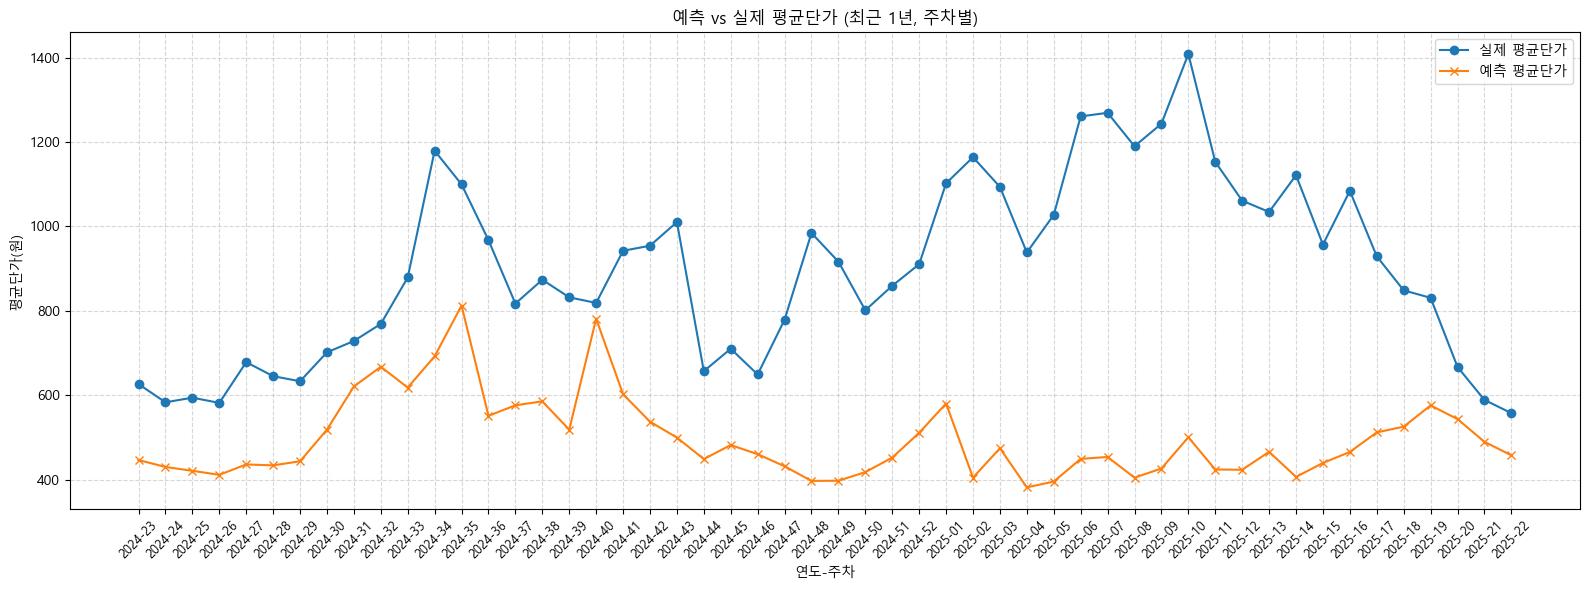

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정 (Windows 기준)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. 예측 결과를 test_df에 추가
test_df = test_df.copy()
test_df["예측값"] = y_pred
test_df["실제값"] = y_test.values

# 2. 최근 1년(52주) 주차 정보 정렬
recent_weeks = (
    test_df[["year", "week", "week_start"]]
    .drop_duplicates()
    .sort_values("week_start")
    .tail(52)
    .reset_index(drop=True)
)
recent_weeks["연도_주차"] = recent_weeks["year"].astype(str) + "-" + recent_weeks["week"].astype(str).str.zfill(2)

# 3. 주차별 평균 집계
weekly_result = (
    test_df.groupby(["year", "week"])[["실제값", "예측값"]]
    .mean()
    .reset_index()
)
weekly_result["연도_주차"] = weekly_result["year"].astype(str) + "-" + weekly_result["week"].astype(str).str.zfill(2)

# 4. 누락 주차 포함한 병합
plot_df = recent_weeks.merge(weekly_result, on=["year", "week", "연도_주차"], how="left")

# 5. 시각화
plt.figure(figsize=(16, 6))
plt.plot(plot_df["연도_주차"], plot_df["실제값"], label="실제 평균단가", marker="o")
plt.plot(plot_df["연도_주차"], plot_df["예측값"], label="예측 평균단가", marker="x")
plt.title("예측 vs 실제 평균단가 (최근 1년, 주차별)")
plt.xlabel("연도-주차")
plt.ylabel("평균단가(원)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
import numpy as np
import pandas as pd

# 1. 예측할 주차 생성
future_weeks = [23, 24, 25, 26, 27, 28, 29, 30]
base_year = 2025
last_week_start = df_model[df_model["year"] == 2025]["week_start"].max()

# 2. 입력 템플릿 생성: 최근 주차 평균으로 채움
template = df_model[df_model["year"] == 2025].copy()
recent_avg = template.select_dtypes(include=[np.number]).mean()

# 3. 각 주차에 대해 행 생성
future_rows = []
for week in future_weeks:
    row = recent_avg.copy()
    row["year"] = base_year
    row["week"] = week
    row["week_sin"] = np.sin(2 * np.pi * week / 52)
    row["week_cos"] = np.cos(2 * np.pi * week / 52)
    row["week_start"] = last_week_start + pd.Timedelta(weeks=week - 22)  # 22주차 이후부터 계속
    future_rows.append(row)

future_input = pd.DataFrame(future_rows)

# 4. 누락된 열 채우기
for col in X_train.columns:
    if col not in future_input.columns:
        future_input[col] = 0  # 원핫인코딩 누락 대응

# 5. 예측용 데이터 정리
X_future = future_input[X_train.columns].astype(np.float32)

# 6. 예측 실행
future_preds = model.predict(X_future)

# 7. 결과 정리
result_df = pd.DataFrame({
    "year": future_input["year"],
    "week": future_input["week"],
    "week_start": future_input["week_start"],
    "예측값": future_preds
})

result_df["연도_주차"] = (
    result_df["year"].astype(int).astype(str) + "-" + result_df["week"].astype(int).astype(str).str.zfill(2)
)

result_df = result_df[["연도_주차", "예측값", "week_start"]]
display(result_df)


,연도_주차,예측값,week_start
0,2025-23,341.025696,2025-06-02
1,2025-24,341.460358,2025-06-09
2,2025-25,333.860565,2025-06-16
3,2025-26,296.186401,2025-06-23
4,2025-27,315.069946,2025-06-30
5,2025-28,304.877594,2025-07-07
6,2025-29,304.877594,2025-07-14
7,2025-30,379.582916,2025-07-21


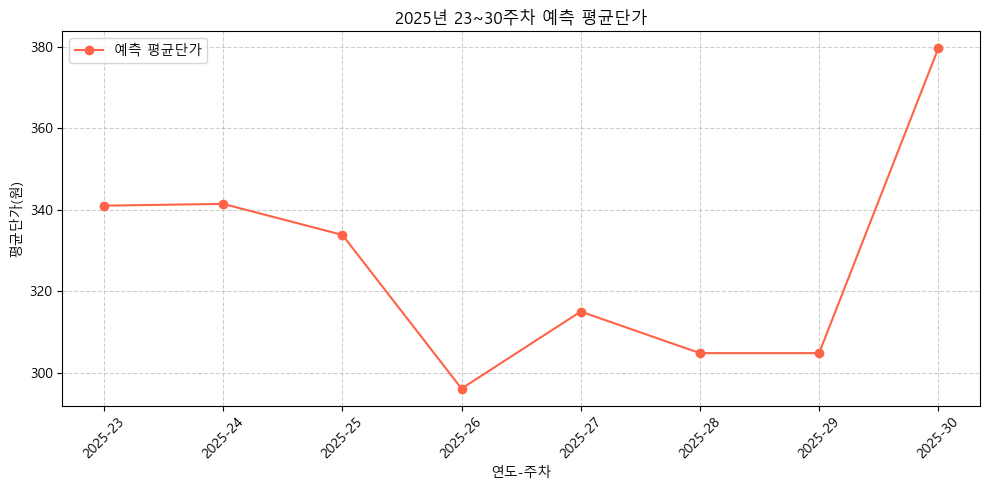

In [48]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(result_df["연도_주차"], result_df["예측값"], marker="o", color="tomato", label="예측 평균단가")
plt.title("2025년 23~30주차 예측 평균단가")
plt.xlabel("연도-주차")
plt.ylabel("평균단가(원)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 데이터 불러오기
df = pd.read_csv("EDA/무(EDA용)_스케일링만.csv", encoding="cp949")
df = df.drop(columns=["등급코드"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. 주기 파생변수
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. 평균단가 이동변수 추가 (직팜산지코드별 그룹)
group_cols = ["직팜산지코드"]
df["평균단가(원)_lag1"] = df.groupby(group_cols)["평균단가(원)"].shift(1)
df["평균단가(원)_lag2"] = df.groupby(group_cols)["평균단가(원)"].shift(2)
df["평균단가(원)_ma3"] = (
    df.groupby(group_cols)["평균단가(원)"]
    .shift(1)
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)
df["평균단가(원)_ma5"] = (
    df.groupby(group_cols)["평균단가(원)"]
    .shift(1)
    .rolling(window=5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

In [34]:
# 4. 변수 정의
target_col = "평균단가(원)"
lag_features = [col for col in df.columns if "_t-" in col]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["품종코드"]
numeric_features = ["총거래량(kg)", "week_sin", "week_cos"]
price_features = ["평균단가(원)_lag1", "평균단가(원)_lag2", "평균단가(원)_ma3", "평균단가(원)_ma5"]

used_features = (
    numeric_features + lag_features + derived_features +
    categorical_cols + price_features + ["직팜산지코드", "year", "week", "week_start"]
)

# 5. 결측치 제거 및 학습 데이터 선택
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = df_model[df_model["year"] <= 2024].copy()


In [35]:
# 6. KFold 타겟인코딩 (직팜산지코드)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
df_model["직팜산지코드_te"] = np.nan

for train_idx, val_idx in kf.split(df_model):
    train_fold = df_model.iloc[train_idx]
    val_fold = df_model.iloc[val_idx]
    means = train_fold.groupby("직팜산지코드")[target_col].mean()
    df_model.iloc[val_idx, df_model.columns.get_loc("직팜산지코드_te")] = val_fold["직팜산지코드"].map(means)

global_mean = df_model[target_col].mean()
df_model["직팜산지코드_te"] = df_model["직팜산지코드_te"].fillna(global_mean)

# 7. 품종코드 원핫인코딩
df_model = pd.get_dummies(df_model, columns=["품종코드"])

# 8. 학습 데이터 구성
y = df_model[target_col]
X = df_model.drop(columns=["평균단가(원)", "year", "week", "week_start", "직팜산지코드"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

# XGB 기본 모델
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGB 기본 모델
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# 그리드 탐색 대상 하이퍼파라미터 범위 (적당한 범위로 설정)
param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [6, 8],
    "n_estimators": [100, 200],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# GridSearchCV 정의
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1  # 모든 CPU 코어 사용
)

# 학습 (X, y는 기존 학습 데이터 그대로 사용)
grid_search.fit(X, y)

# 결과 출력
print("📌 최적 하이퍼파라미터:")
print(grid_search.best_params_)

print(f"✅ 평균 RMSE (cross-val): {-grid_search.best_score_:.2f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
# 9. 모델 학습
best_model = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.05,
    max_depth=6,
    n_estimators=200,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42
)
best_model.fit(X, y)

In [ ]:
# 10. 평가 출력
y_pred = model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"✅ RMSE (train): {rmse:.2f}")
print(f"✅ MAE (train): {mae:.2f}")
print(f"✅ R² Score (train): {r2:.4f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2025년 테스트셋 생성
test_df = df[df["year"] == 2025].dropna(subset=used_features).copy()
y_test = test_df["평균단가(원)"]

# 타겟 및 입력 변수 구성
X_test = test_df.drop(columns=["평균단가(원)", "year", "week", "week_start", "직팜산지코드"], errors="ignore")
X_test = pd.get_dummies(X_test, columns=["품종코드"])

# 학습에 사용된 컬럼 목록과 동일하게 정리
model_cols = best_model.feature_names_in_
missing_cols = set(model_cols) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[model_cols]  # 컬럼 순서 일치

# 예측
y_pred = best_model.predict(X_test)

# 시각화 준비
plt.rcParams["font.family"] = "Malgun Gothic"  # 한글 폰트
plt.rcParams["axes.unicode_minus"] = False

test_df = test_df.copy()
test_df["예측값"] = y_pred
test_df["실제값"] = y_test.values

# 최근 52주 정보 정리
recent_weeks = (
    test_df[["year", "week", "week_start"]]
    .drop_duplicates()
    .sort_values("week_start")
    .tail(52)
    .reset_index(drop=True)
)
recent_weeks["연도_주차"] = recent_weeks["year"].astype(str) + "-" + recent_weeks["week"].astype(str).str.zfill(2)

# 주차별 평균단가 집계
weekly_result = (
    test_df.groupby(["year", "week"])[["실제값", "예측값"]]
    .mean()
    .reset_index()
)
weekly_result["연도_주차"] = weekly_result["year"].astype(str) + "-" + weekly_result["week"].astype(str).str.zfill(2)

# 누락 주차 포함 정렬
plot_df = recent_weeks.merge(weekly_result, on=["year", "week", "연도_주차"], how="left")

In [ ]:
# ✅ 시각화
plt.figure(figsize=(16, 6))
plt.plot(plot_df["연도_주차"], plot_df["실제값"], label="실제 평균단가", marker="o")
plt.plot(plot_df["연도_주차"], plot_df["예측값"], label="예측 평균단가", marker="x")
plt.title("예측 vs 실제 평균단가 (최근 1년, 주차별)")
plt.xlabel("연도-주차")
plt.ylabel("평균단가(원)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("📊 예측값 분산:", np.std(y_pred))
print("📊 실제값 분산:", np.std(y_test.values))

In [35]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost.callback import EarlyStopping

# 1. 데이터 불러오기
df = pd.read_csv("EDA/무_월차낼게요.csv", encoding="cp949")
df = df.drop(columns=["등급코드"], errors="ignore")
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.sort_values("week_start")

# 2. 주기 파생변수
df["week_sin"] = np.sin(2 * np.pi * df["week"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week"] / 52)

# 3. 변화율 기반 파생변수
group_cols = ["직팜산지코드"]
df["총거래량_lag1"] = df.groupby(group_cols)["총거래량(kg)"].shift(1)
df["총거래량_변화율"] = np.where(
    df["총거래량_lag1"] == 0,
    0,
    (df["총거래량(kg)"] - df["총거래량_lag1"]) / df["총거래량_lag1"]
)
df["평균단가_전년동주"] = df.groupby(group_cols)["평균단가(원)"].shift(52)
df["평균단가_전년비"] = (df["평균단가(원)"] - df["평균단가_전년동주"]) / df["평균단가_전년동주"]

# 4. 변수 정의
target_col = "평균단가(원)"
lag_features = [col for col in df.columns if "_t-" in col]
derived_features = ["holiday_flag", "holiday_score", "grow_score"]
categorical_cols = ["품종코드"]
numeric_features = ["총거래량(kg)", "week_sin", "week_cos"]
change_features = ["총거래량_변화율", "평균단가_전년비"]

used_features = (
    numeric_features + lag_features + derived_features +
    categorical_cols + change_features + ["직팜산지코드", "year", "week", "week_start"]
)

In [36]:
# 5. 결측치 제거 + 2024년까지 학습데이터 선택
df_model = df.dropna(subset=[target_col] + used_features).copy()
df_model = df_model[df_model["year"] <= 2024].copy()

# 6. Label Encoding: 직팜산지코드
le = LabelEncoder()
df_model["직팜산지코드_le"] = le.fit_transform(df_model["직팜산지코드"])

# 7. 품종코드 원핫인코딩
df_model = pd.get_dummies(df_model, columns=["품종코드"])

# 8. 입력/출력 분리
y = df_model[target_col]
X = df_model.drop(columns=[target_col, "year", "week", "week_start", "직팜산지코드"], errors="ignore")
X = X.select_dtypes(include=[np.number]).astype(np.float32)

# 9. 스케일링 대상 변수
scale_cols = ["총거래량(kg)", "총거래량_변화율", "평균단가_전년비"]
scaler = ColumnTransformer(
    transformers=[
        ("scaler", RobustScaler(), scale_cols)
    ],
    remainder="passthrough",  # 나머지는 그대로 사용
    verbose_feature_names_out=False
)

# 10. 파이프라인 정의
pipe = Pipeline([
    ("transform", scaler)
])

# 11. Train/Validation 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 12. 스케일링 적용
X_train_scaled = pipe.fit_transform(X_train)
X_val_scaled = pipe.transform(X_val)

In [37]:
# 13. RandomizedSearchCV with TimeSeriesSplit
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
param_dist = {
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "gamma": [0, 1, 5],
    "n_estimators": [100, 150, 200, 300]
}

tscv = TimeSeriesSplit(n_splits=3)
rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
X_scaled = pipe.fit_transform(X)
rand_search.fit(X_scaled, y)

print("📌 최적 하이퍼파라미터:")
print(rand_search.best_params_)
print(f"✅ 평균 RMSE (cross-val): {-rand_search.best_score_:.2f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
📌 최적 하이퍼파라미터:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.9}
✅ 평균 RMSE (cross-val): 27.08


In [38]:
# 14. 최적 하이퍼파라미터로 재학습 (조기 종료 포함)
best_model = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    **rand_search.best_params_
)

# 15. 모델 학습 (조기 종료 포함)
best_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    callbacks=[EarlyStopping(rounds=30)],
    verbose=True
)

# 16. 검증 데이터 성능 평가
y_val_pred = best_model.predict(X_val_scaled)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"✅ RMSE (val): {rmse:.2f}")
print(f"✅ MAE (val): {mae:.2f}")
print(f"✅ R² Score (val): {r2:.4f}")

[0]	validation_0-rmse:706.79231


C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:673.89498
[2]	validation_0-rmse:642.51052
[3]	validation_0-rmse:612.76235
[4]	validation_0-rmse:584.26311
[5]	validation_0-rmse:564.41729
[6]	validation_0-rmse:547.72009
[7]	validation_0-rmse:522.78836
[8]	validation_0-rmse:498.57203
[9]	validation_0-rmse:484.47345
[10]	validation_0-rmse:462.52051
[11]	validation_0-rmse:441.26674
[12]	validation_0-rmse:429.66697
[13]	validation_0-rmse:410.45727
[14]	validation_0-rmse:398.19966
[15]	validation_0-rmse:380.43857
[16]	validation_0-rmse:363.60694
[17]	validation_0-rmse:347.76216
[18]	validation_0-rmse:332.37911
[19]	validation_0-rmse:317.79567
[20]	validation_0-rmse:304.18948
[21]	validation_0-rmse:295.74027
[22]	validation_0-rmse:283.12290
[23]	validation_0-rmse:270.93389
[24]	validation_0-rmse:259.37026
[25]	validation_0-rmse:248.43143
[26]	validation_0-rmse:238.17082
[27]	validation_0-rmse:232.84139
[28]	validation_0-rmse:223.38477
[29]	validation_0-rmse:214.29625
[30]	validation_0-rmse:205.40425
[31]	validation_0-r

In [24]:
from sklearn.preprocessing import LabelEncoder

# 학습용 LabelEncoder 정의 및 학습
le = LabelEncoder()
le.fit(df_model["직팜산지코드"])  # df_model은 year <= 2024

# 테스트셋 대상 산지코드
test_df = df[df["year"] == 2025].copy()
test_regions = set(test_df["직팜산지코드"].unique())
train_regions = set(le.classes_)

# 테스트셋에 학습셋에 없던 산지코드가 있는가?
unseen_regions = test_regions - train_regions

if unseen_regions:
    print(f"⚠️ 테스트셋에 학습셋에 없던 LabelEncoder 클래스 존재: {unseen_regions}")
else:
    print("✅ LabelEncoder: 테스트셋의 산지코드는 학습셋에 모두 포함되어 있음.")

⚠️ 테스트셋에 학습셋에 없던 LabelEncoder 클래스 존재: {1088, 1089, 1090, 1091, 1124, 1128, 1130, 1020, 1101, 1134, 1007, 1072, 1041, 1140, 1015, 1082, 1052}


In [25]:
# 총 학습 샘플 수
n_samples = X.shape[0]

# 총 피처 수
n_features = X.shape[1]

print(f"📦 학습 데이터 수: {n_samples}")
print(f"🔢 피처 수: {n_features}")
print(f"📐 샘플당 피처 비율: {n_samples / n_features:.2f}")

📦 학습 데이터 수: 76792
🔢 피처 수: 41
📐 샘플당 피처 비율: 1872.98


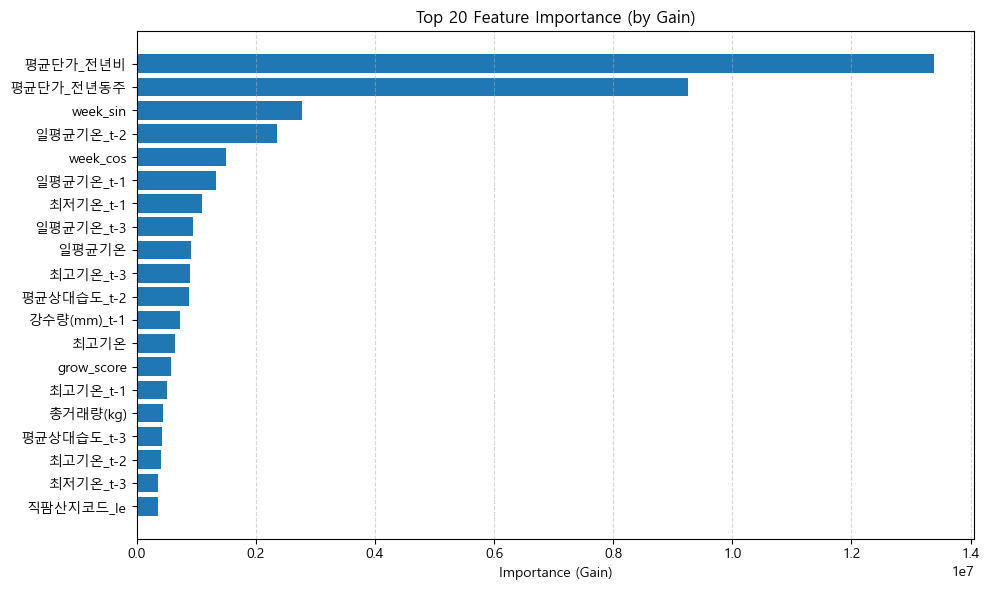

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 2. feature 이름 추출
feature_names = pipe.get_feature_names_out()

# 3. 중요도 추출 (f0, f1 등으로 반환됨)
importance = best_model.get_booster().get_score(importance_type="gain")

# 4. f0 → 실제 이름으로 매핑
mapped_importance = {
    feature_names[int(f[1:])]: score for f, score in importance.items()
}

# 5. DataFrame 변환 및 정렬
importance_df = pd.DataFrame({
    "feature": list(mapped_importance.keys()),
    "importance": list(mapped_importance.values())
}).sort_values("importance", ascending=False).reset_index(drop=True)

# 6. 시각화
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df["feature"][:top_n][::-1],
    importance_df["importance"][:top_n][::-1]
)
plt.xlabel("Importance (Gain)")
plt.title(f"Top {top_n} Feature Importance (실제 변수 이름 기준)")
plt.tight_layout()
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.show()

In [27]:
# 변수 중요도 딕셔너리 (Gain 기준)
importance_dict = best_model.get_booster().get_score(importance_type="gain")

# 총거래량_변화율 중요도 확인
target_feature = "총거래량_변화율"
importance_value = importance_dict.get(target_feature, 0)

print(f"📌 '총거래량_변화율' 중요도 (Gain): {importance_value:.4f}")

📌 '총거래량_변화율' 중요도 (Gain): 224145.6562


In [28]:
import pandas as pd

# 변수 중요도 (Gain 기준) 정렬
importance_dict = best_model.get_booster().get_score(importance_type="gain")
importance_df = pd.DataFrame({
    "feature": list(importance_dict.keys()),
    "importance": list(importance_dict.values())
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

# 순위 부여 (1위부터 시작)
importance_df["rank"] = importance_df.index + 1

# '총거래량_변화율'의 순위 확인
target_feature = "총거래량_변화율"
target_row = importance_df[importance_df["feature"] == target_feature]

if not target_row.empty:
    rank = int(target_row["rank"].values[0])
    gain = float(target_row["importance"].values[0])
    print(f"📊 '총거래량_변화율'의 변수 중요도 순위: {rank}위 / 총 {len(importance_df)}개 변수 중")
    print(f"📈 Gain 값: {gain:.2f}")
else:
    print("❌ '총거래량_변화율'은 변수 중요도 목록에 없습니다.")

📊 '총거래량_변화율'의 변수 중요도 순위: 28위 / 총 38개 변수 중
📈 Gain 값: 224145.66


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. 2025년 테스트셋 준비
test_df = df[df["year"] == 2025].copy()
y_test = test_df["평균단가(원)"].copy()
test_df = test_df.drop(columns=["평균단가(원)"])

# 2. Label Encoding (직팜산지코드)
known_codes = set(le.classes_)
test_df = test_df[test_df["직팜산지코드"].isin(known_codes)].copy()
y_test = y_test.loc[test_df.index]
test_df["직팜산지코드_le"] = le.transform(test_df["직팜산지코드"])

# 3. 원핫인코딩 (품종코드)
test_df = pd.get_dummies(test_df, columns=["품종코드"])

# 4. 누락된 품종코드 컬럼 추가
missing_cols = set(df_model.columns) - set(test_df.columns)
missing_cols = [col for col in missing_cols if col.startswith("품종코드_")]
for col in missing_cols:
    test_df[col] = 0

# 5. 테스트셋 입력 데이터 구성
X_test = test_df.drop(columns=["year", "week", "week_start", "직팜산지코드"], errors="ignore")
X_test = X_test.select_dtypes(include=[np.number]).astype(np.float32)

# 6. 컬럼 순서 맞추기 + 스케일링 적용
X_test_scaled = pipe.transform(X_test)

# 7. 예측
y_pred = best_model.predict(X_test_scaled)

# 8. 성능 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE (test): {rmse:.2f}")
print(f"✅ MAE  (test): {mae:.2f}")
print(f"✅ R²   (test): {r2:.4f}")

✅ RMSE (test): 48.50
✅ MAE (test): 32.96
✅ R² Score (test): 0.9850


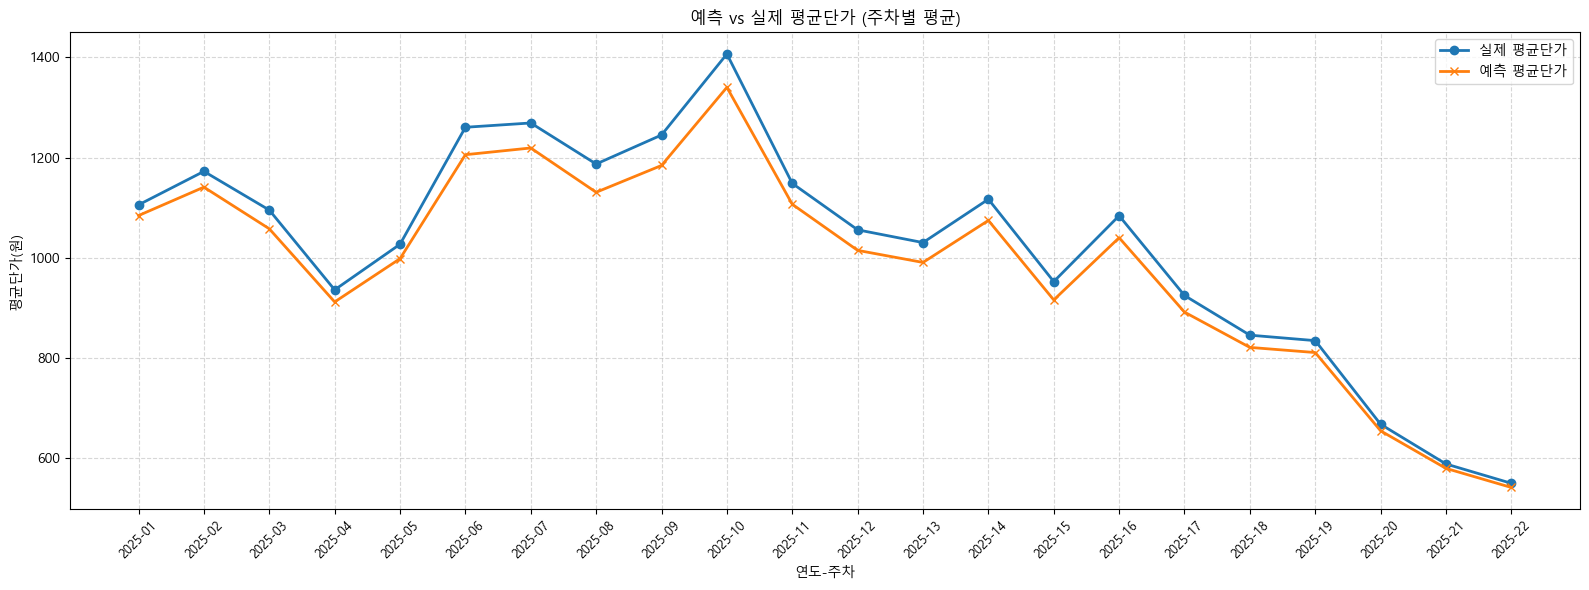

In [30]:
# 9. 시각화 준비
plot_df = test_df.reset_index(drop=True)
plot_df["실제값"] = y_test.reset_index(drop=True)
plot_df["예측값"] = y_pred
plot_df["year"] = df.loc[plot_df.index, "year"].values
plot_df["week"] = df.loc[plot_df.index, "week"].values

# 10. 주차별 평균 집계
weekly_avg = (
    plot_df.groupby(["year", "week"])[["실제값", "예측값"]]
    .mean()
    .reset_index()
)
weekly_avg["연도_주차"] = (
    weekly_avg["year"].astype(str) + "-" + weekly_avg["week"].astype(str).str.zfill(2)
)

# 11. 시각화
plt.figure(figsize=(16, 6))
plt.plot(weekly_avg["연도_주차"], weekly_avg["실제값"], label="실제 평균단가", marker="o", linewidth=2)
plt.plot(weekly_avg["연도_주차"], weekly_avg["예측값"], label="예측 평균단가", marker="x", linewidth=2)
plt.title(" 2025년 주차별 평균단가 예측 결과")
plt.xlabel("연도-주차")
plt.ylabel("평균단가(원)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

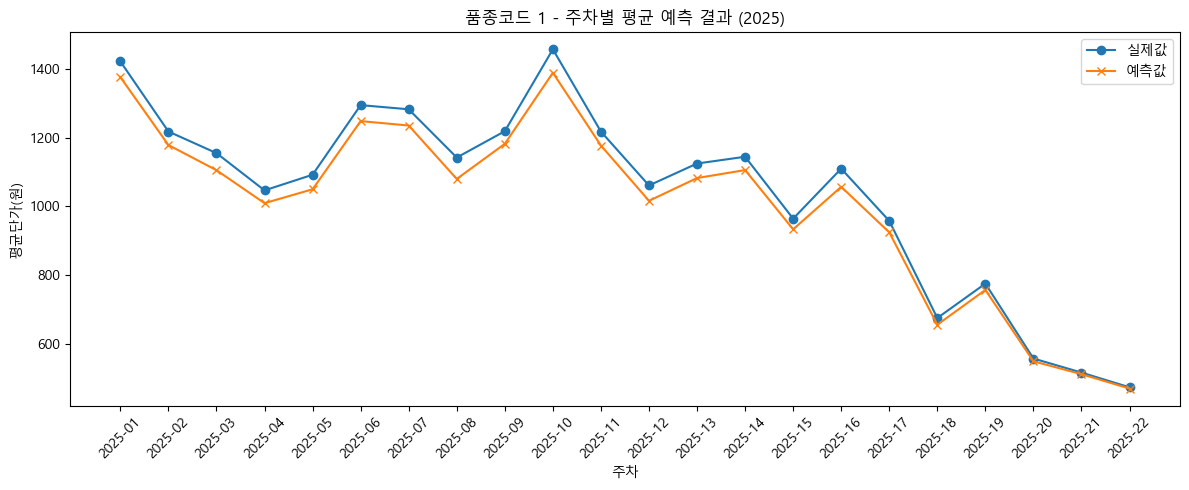

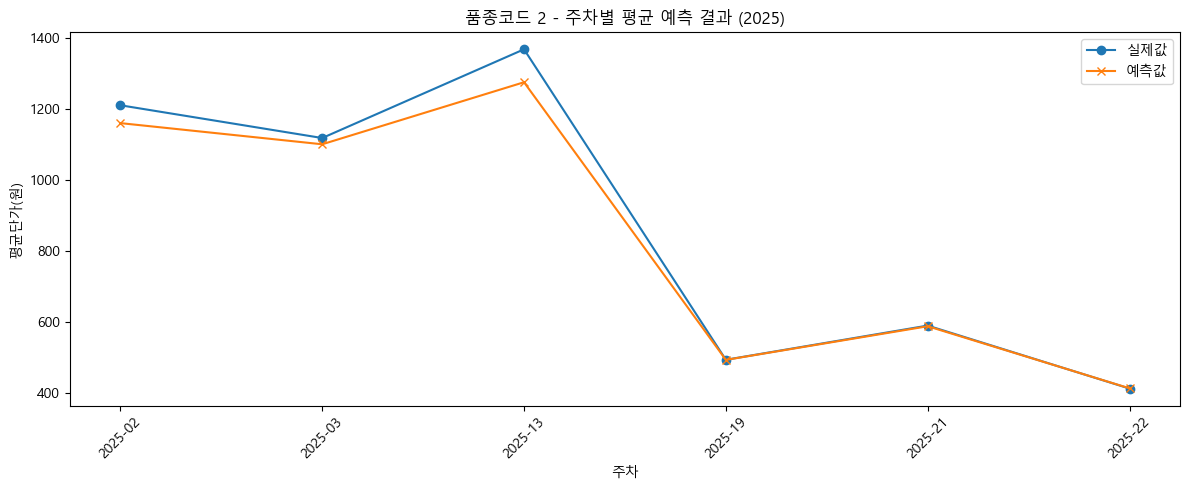

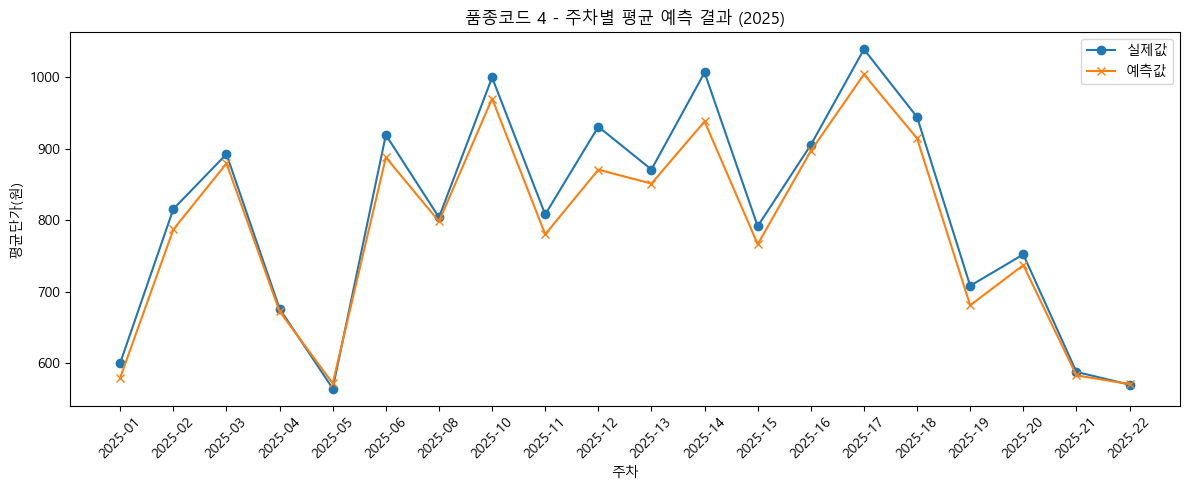

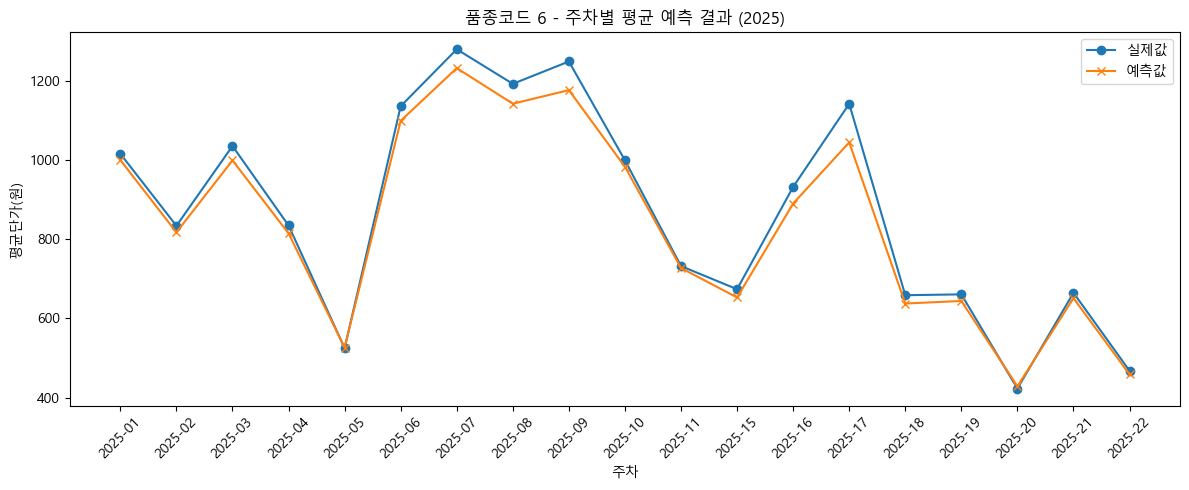

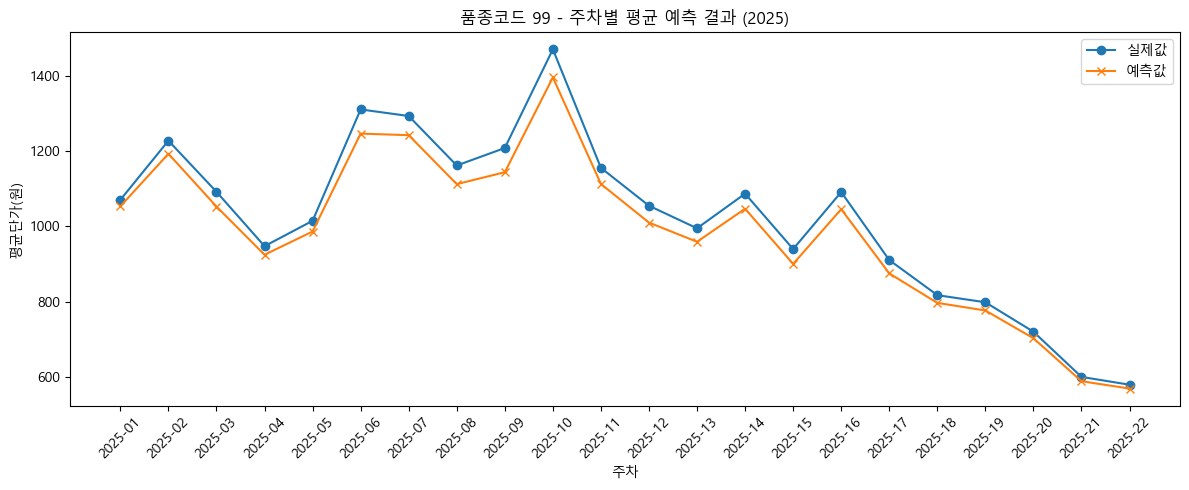

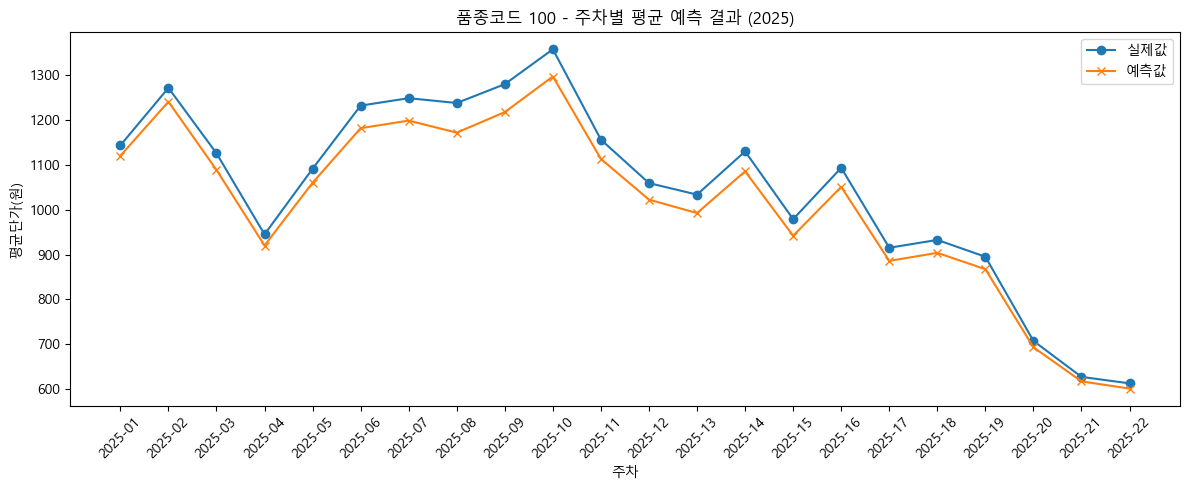

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. 2025년 테스트셋 준비
test_df = df[df["year"] == 2025].copy()
y_test = test_df["평균단가(원)"].copy()
test_df = test_df.drop(columns=["평균단가(원)"])

# 2. Label Encoding: 직팜산지코드
known_codes = set(le.classes_)
test_df = test_df[test_df["직팜산지코드"].isin(known_codes)].copy()
y_test = y_test.loc[test_df.index].reset_index(drop=True)
test_df["직팜산지코드_le"] = le.transform(test_df["직팜산지코드"])

# 3. 품종코드 보존
test_df["품종코드_raw"] = test_df["품종코드"]

# 4. 원핫인코딩 및 누락된 컬럼 채우기
test_df = pd.get_dummies(test_df, columns=["품종코드"])
model_cols = [col for col in df_model.columns if col.startswith("품종코드_")]
for col in model_cols:
    if col not in test_df.columns:
        test_df[col] = 0

# 5. 예측용 입력 데이터 구성
X_test = test_df.drop(columns=["year", "week", "week_start", "직팜산지코드"], errors="ignore")
X_test = X_test.select_dtypes(include=[np.number]).astype(np.float32)

# 6. 컬럼 순서 맞추기 + 스케일링 적용
X_test = X_test[pipe.get_feature_names_out()]  # pipe 기준으로 정렬
X_test_scaled = pipe.transform(X_test)

# 7. 예측 수행
y_pred = best_model.predict(X_test_scaled)

# 8. 결과 결합
result_df = test_df.reset_index(drop=True).copy()
result_df["실제값"] = y_test
result_df["예측값"] = y_pred
result_df["year"] = test_df["year"].values
result_df["week"] = test_df["week"].values
result_df["주차"] = result_df["year"].astype(str) + "-" + result_df["week"].astype(str).str.zfill(2)

# 9. 주차별 평균 계산
avg_weekly = (
    result_df.groupby(["품종코드_raw", "주차"], as_index=False)[["실제값", "예측값"]]
    .mean()
)

# 10. 품종별 시각화
for v in sorted(avg_weekly["품종코드_raw"].unique()):
    v_df = avg_weekly[avg_weekly["품종코드_raw"] == v].copy()

    plt.figure(figsize=(12, 5))
    plt.plot(v_df["주차"], v_df["실제값"], label="실제 평균단가", marker="o", linewidth=2)
    plt.plot(v_df["주차"], v_df["예측값"], label="예측 평균단가", marker="x", linewidth=2)
    plt.title(f"품종코드 {v} - 2025년 주차별 평균 예측 결과")
    plt.xlabel("주차 (연도-주차)")
    plt.ylabel("평균단가(원)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

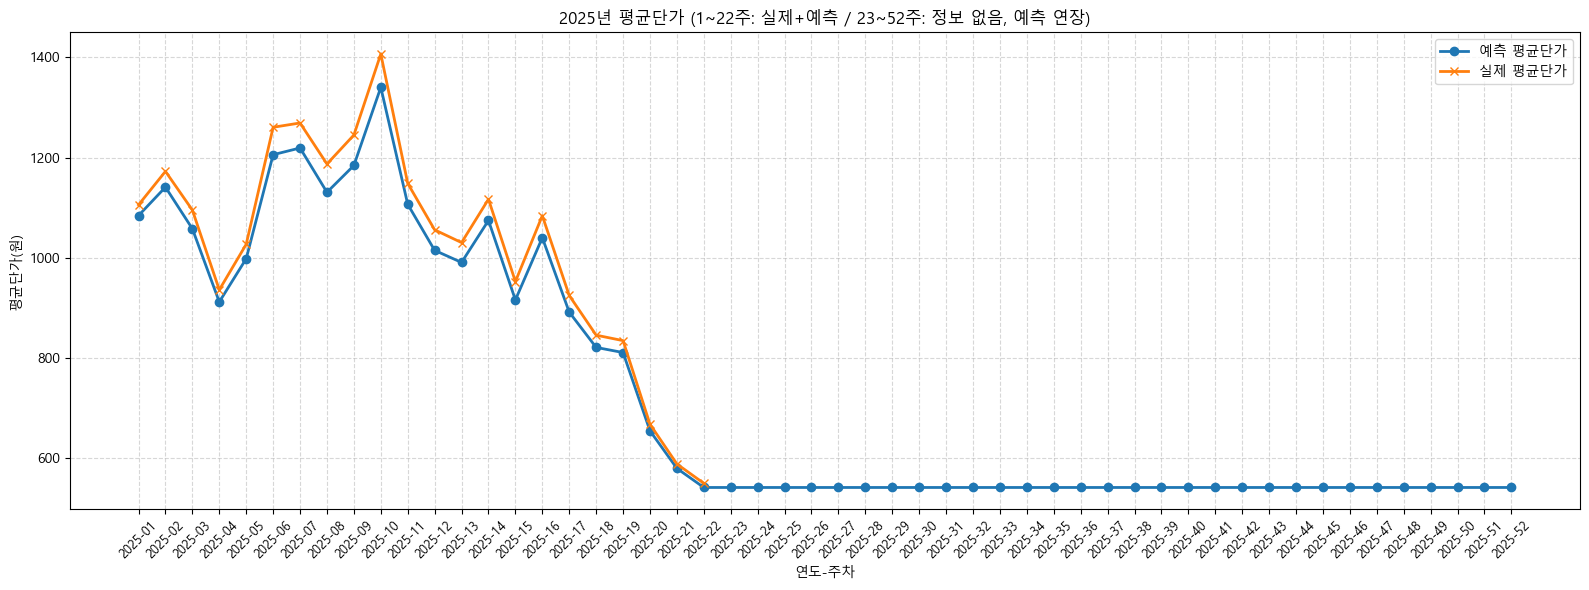

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 1. 1~22주차 실제값 및 예측값
part1_df = test_df.copy()
part1_df["예측값"] = y_pred
part1_df["실제값"] = y_test.values
part1_df["연도_주차"] = part1_df["year"].astype(str) + "-" + part1_df["week"].astype(str).str.zfill(2)

# 주차별 평균 집계
part1_avg = (
    part1_df.groupby(["year", "week", "연도_주차"])[["실제값", "예측값"]]
    .mean()
    .reset_index()
)

# 2. 23~52주차: 정보 없음 → 마지막 예측값 유지
last_pred = part1_avg["예측값"].iloc[-1]
weeks_future = pd.DataFrame({
    "year": [2025]*30,
    "week": list(range(23, 53)),
})
weeks_future["연도_주차"] = weeks_future["year"].astype(str) + "-" + weeks_future["week"].astype(str).str.zfill(2)
weeks_future["예측값"] = last_pred
weeks_future["실제값"] = np.nan  # 실제값 없음

# 3. 병합
plot_df = pd.concat([part1_avg, weeks_future], ignore_index=True)

# 4. 시각화
plt.figure(figsize=(16, 6))
plt.plot(plot_df["연도_주차"], plot_df["예측값"], label="예측 평균단가", marker="o", linewidth=2)
plt.plot(plot_df["연도_주차"], plot_df["실제값"], label="실제 평균단가", marker="x", linewidth=2)
plt.title("2025년 평균단가 (1~22주: 실제+예측 / 23~52주: 정보 없음, 예측 연장)")
plt.xlabel("연도-주차")
plt.ylabel("평균단가(원)")
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()